In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install pydub

In [5]:
import math
import numpy as np
from pydub import AudioSegment
import matplotlib.pyplot as plt

In [6]:
import subprocess
import wave
import os
import librosa
import librosa.display
# import librosa.waveplot
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Video To Audio Conversion using ffmpeg

In [8]:
import subprocess

def convert_mov_to_mp3(input_file, output_file):
    # FFmpeg command to convert .mov to .mp3
    cmd = [
        'ffmpeg',
        '-i', input_file,  # input .mov file
        '-vn',             # disable video
        '-acodec', 'libmp3lame',  # set audio codec to MP3
        '-q:a', '2',       # set audio quality (2 is a good default)
        output_file         # output .mp3 file
    ]

    try:
        # Run FFmpeg command
        subprocess.run(cmd, check=True)
        print(f"Conversion successful: {output_file}")
    except subprocess.CalledProcessError as e:
        print(f"Error during conversion: {e}")



In [9]:
input_file = '/content/drive/MyDrive/Dataset/match1_30mins.mp4'
output_file = '/content/drive/MyDrive/Dataset/match1_output.mp3'

convert_mov_to_mp3(input_file, output_file)

Conversion successful: /content/drive/MyDrive/Dataset/match1_output.mp3


In [13]:
FILE_NAME = "/content/drive/MyDrive/Dataset/match1_output.mp3"
AUDIO_FILE = "/content/drive/MyDrive/Dataset/match1wav.wav"

# convert mp3 file to wav
sound = AudioSegment.from_mp3(os.path.join(FILE_NAME))
sound.export(AUDIO_FILE, format="wav")
print("WAV file generated from the MP3 file successfully")
print()

WAV file generated from the MP3 file successfully



#The duration is equal to the number of frames divided by the framerate (frames per second)



import wave
import contextlib
fname = "/content/output.wav"
with contextlib.closing(wave.open(fname,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)
    print(duration)

In [15]:
#mutagen Python module to handle audio metadata

!pip install mutagen

In [17]:
from mutagen.mp3 import MP3
audio = MP3("/content/drive/MyDrive/Dataset/match1_output.mp3")
print(audio.info.length)  #prints the length of the MP3 file in seconds

1536.182857142857


In [18]:
#data visualization
import librosa
import librosa.display
import matplotlib.pyplot as plt


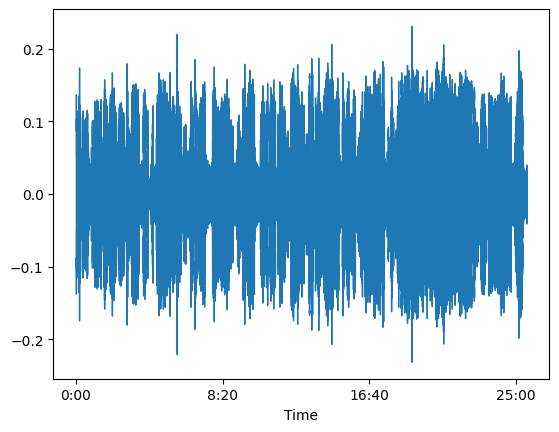

In [20]:
# data, sampling_rate = librosa.load(os.path.join(AUDIO_FILE))
# plt.figure(figsize=(40, 10))

# librosa.display.waveplot(data,sampling_rate)
# plt.title(AUDIO_FILE)
# plt.show()

path = "/content/drive/MyDrive/Dataset/match1wav.wav"
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)


<ipython-input-21-a625ea33e19a>:15: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(S), sr=sampling_rate, x_axis='time', y_axis='log')


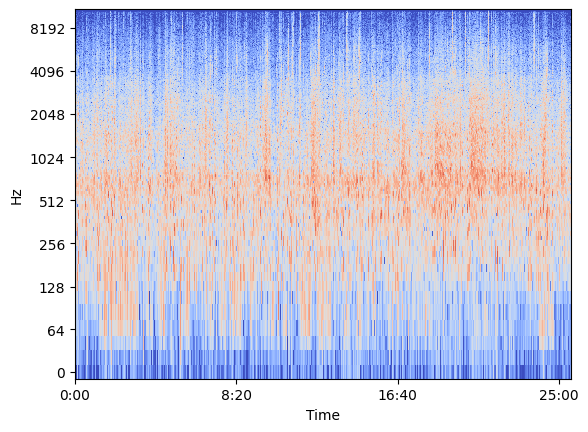

In [21]:
import librosa

# Load the audio file
data, sampling_rate = librosa.load(path)

# Generate the spectrogram
# short-time Fourier transform (STFT) of the audio signal
# The parameters n_fft=1024 and hop_length=512 control the size of the snapshots and how much they overlap.
S = librosa.stft(data, n_fft=1024, hop_length=512)


# The short-time Fourier transform (STFT) is a technique that helps us analyze this time-varying frequency content

# Display the spectrogram
librosa.display.specshow(librosa.amplitude_to_db(S), sr=sampling_rate, x_axis='time', y_axis='log')


In [22]:
# Automatic speech recognition (ASR) model developed by OpenAI
!pip install -U openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 9.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.2 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801356 sha256=8d74c1d818dfec558029a5b5a9f2a56bbd5344d93e8ad862d160a0fce0ace138
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.


In [23]:
from pydub import AudioSegment
import whisper

# Load the Whisper ASR model
model = whisper.load_model("base")

# Load the audio file
audio_file = AudioSegment.from_wav("/content/drive/MyDrive/Dataset/match1wav.wav")

# Transcribe the audio file with timestamps at 2-minute intervals
segment_duration = 12000  # 2 minutes in milliseconds
timestamp_interval = 1000
timestamps = []

start_time = 0
while start_time < len(audio_file):
    end_time = min(start_time + segment_duration, len(audio_file))
    segment = audio_file[start_time:end_time]
    segment.export("/content/temp.wav", format="wav")
    result = model.transcribe("/content/temp.wav")
    timestamps.append((start_time, end_time, result["text"]))
    start_time += segment_duration

# Output the transcriptions and timestamps in minutes
for start, end, text in timestamps:
    print(f"Start: {start / 60000:.2f} min - End: {end / 60000:.2f} min\n{text}\n")

100%|███████████████████████████████████████| 139M/139M [00:06<00:00, 23.5MiB/s]


Start: 0.00 min - End: 0.20 min
 show reals. We'll see what happens in the real show. If you do look back at the goals he was scoring in Italy last season, he scores them with power of both sides. He is

Start: 0.20 min - End: 0.40 min
 left footed striker but you wouldn't always know it.

Start: 0.40 min - End: 0.60 min
 now goes to the lay out empty pass near Monday for the table at the

Start: 0.60 min - End: 0.80 min
 to see that. It's not great for me.

Start: 0.80 min - End: 1.00 min
 Another fan José Luis

Start: 1.00 min - End: 1.20 min
 This area is managed by Ember. Yeah. P unprecedented. That's the birth spot goodbye the�� and started out by Russ.

Start: 1.20 min - End: 1.40 min
 the ball with the deck and rice trying to put a bit of urgency into the press there.

Start: 1.40 min - End: 1.60 min
 For now there's one masaka just

Start: 1.60 min - End: 1.80 min
 the big venues last season. It has just been well documented with lamentable. One point from eight away games agai

highlight keywords in the transcription

In [24]:
import re
from pydub import AudioSegment
import whisper

def format_keywords(text, keywords):
    for keyword in keywords:
        text = re.sub(r'(?i)\b{}\b'.format(re.escape(keyword)), r'[{0}]#{0}#'.format(keyword), text)
    return text

# Load the Whisper ASR model
model = whisper.load_model("base")

# Load the audio file
audio_file = AudioSegment.from_wav("/content/drive/MyDrive/Dataset/match1wav.wav")

segment_duration = 12000  # 12 seconds

timestamps = []

start_time = 0
while start_time < len(audio_file):
    end_time = min(start_time + segment_duration, len(audio_file))
    segment = audio_file[start_time:end_time]
    segment.export("/content/temp.wav", format="wav")
    result = model.transcribe("/content/temp.wav")
    timestamps.append((start_time, end_time, result["text"]))
    start_time += segment_duration

# Get the keywords to format
keywords = ["goal", "shot", "save", "penalty"]

# Filter the timestamps to only include those that have keywords
keyword_timestamps = []
for start, end, text in timestamps:
    if any(keyword in text for keyword in keywords):
        keyword_timestamps.append((start / 1000 / 60, end / 1000 / 60, text))

# Output the transcriptions and timestamps with formatted keywords in minutes
for start, end, text in keyword_timestamps:
    formatted_text = format_keywords(text, keywords)
    print(f"Start: {start:.2f} min - End: {end:.2f} min\n{formatted_text}\n")


Start: 0.00 min - End: 0.20 min
 show reals. We'll see what happens in the real show. If you do look back at the goals he was scoring in Italy last season, he scores them with power of both sides. He is

Start: 1.80 min - End: 2.00 min
 the game. The game is a little bit more aggressive. It's scored eight goals to 28. The people opposition rounds. That's losing those games by average of three and a half goals to one.

Start: 2.00 min - End: 2.20 min
 the ball. They can see the [goal]#goal#. Something goes against them. And they fall apart. Did you see that? I don't know. I don't know. I don't know. I don't know. I don't know. I don't know. I don't know.

Start: 6.40 min - End: 6.60 min
 the [goal]#goal#. So leave it. I hope it's sacca. The card. It's a smooth, arstable ball movement. What's up into the game? I hope it's a good game. I hope it's a good game. I hope it's a good game.

Start: 20.60 min - End: 20.80 min
 Time got the game just for you. A turn...'ve been [shot]#shot# by Luc

Print only the timestamp audio text part that only has keywords

In [25]:
import re
from pydub import AudioSegment
import whisper  # Assuming you have the whisper library installed

def format_keywords(text, keywords):
    for keyword in keywords:
        text = re.sub(r'(?i)\b{}\b'.format(re.escape(keyword)), r'[{0}]#{0}#'.format(keyword), text)
    return text

# Load the Whisper ASR model
model = whisper.load_model("base")

# Load the audio file
audio_file = AudioSegment.from_wav("/content/drive/MyDrive/Dataset/match1wav.wav")

# Transcribe the audio file with timestamps at 2-minute intervals
segment_duration = 12000  # 2 minutes in milliseconds

timestamps = []

start_time = 0
while start_time < len(audio_file):
    end_time = min(start_time + segment_duration, len(audio_file))
    segment = audio_file[start_time:end_time]
    segment.export("/content/temp.wav", format="wav")
    result = model.transcribe("/content/temp.wav")

    if any(keyword.lower() in result["text"].lower() for keyword in ["goal", "shot", "save", "penalty"]):
        timestamps.append((start_time, end_time, result["text"]))

    start_time += segment_duration

# Output the transcriptions and timestamps with highlighted keywords
output_file_path = "/content/drive/MyDrive/Dataset/Match1_Timestamps/timestamps.txt"  # Change the file path as needed

with open(output_file_path, 'w') as output_file:
    for start, end, text in timestamps:
        highlighted_text = format_keywords(text, ["goal", "shot", "save", "penalty"])
        output_file.write(f"Start: {start / 60000:.2f} min - End: {end / 60000:.2f} min\n{highlighted_text}\n")

        #  output_file.write(f"Start: {start:.2f} min - End: {end:.2f} min\n{highlighted_text}\n")


#RMS PART##########################################################################


In [26]:
def moving_average(interval, samples):
	final_list=[]
	no_of_elements = 44100 * 2 * interval
	for i in range(samples[no_of_elements],len(samples)):
		final_list.append(sum(samples[i:i-no_of_elements:-1])/no_of_elements)
	return final_list

In [27]:
def rms(original_list, interval):
	window_size = int(44100 * 2 * 60 * interval)
	rms_list = []

	for i in range(0, len(original_list) - window_size + 1, window_size):
		window = original_list[i:i+window_size]
		rms = math.sqrt(sum(x**2 for x in window) / len(window))
		rms_list.append(rms)
	return rms_list

In [28]:
audio_file = AudioSegment.from_wav("/content/drive/MyDrive/Dataset/match1wav.wav")

In [29]:
samples = audio_file.get_array_of_samples()

In [30]:
# time interval in minutes
interval = 0.2

In [31]:
rms_values = rms(samples, interval)

In [32]:
import numpy as np

avg_rms = np.mean(rms_values)
std_rms = np.std(rms_values)
threshold = avg_rms + 1.3 * std_rms

print("avg_rms = {:.2f}".format(avg_rms))
print("standard deviation = {:.2f}".format(std_rms))
print("threshold = {:.2f}".format(threshold))

timestamps = []

for j, i in enumerate(rms_values):
    if i >= threshold:
        start_time = round(j * interval, 2)
        end_time = round((j + 1) * interval, 2)
        timestamps.append(f"Start: {start_time:.2f} min - End: {end_time:.2f} min")

print(timestamps)


avg_rms = 680.75
standard deviation = 218.89
threshold = 965.31
['Start: 9.80 min - End: 10.00 min', 'Start: 12.20 min - End: 12.40 min', 'Start: 16.80 min - End: 17.00 min', 'Start: 18.60 min - End: 18.80 min', 'Start: 18.80 min - End: 19.00 min', 'Start: 19.00 min - End: 19.20 min', 'Start: 19.20 min - End: 19.40 min', 'Start: 20.40 min - End: 20.60 min', 'Start: 20.60 min - End: 20.80 min', 'Start: 20.80 min - End: 21.00 min', 'Start: 21.00 min - End: 21.20 min', 'Start: 22.00 min - End: 22.20 min']


In [33]:
# Calculate time values. Assuming each RMS value corresponds to a half-second interval.
time_values = [interval * i for i in range(len(rms_values))]


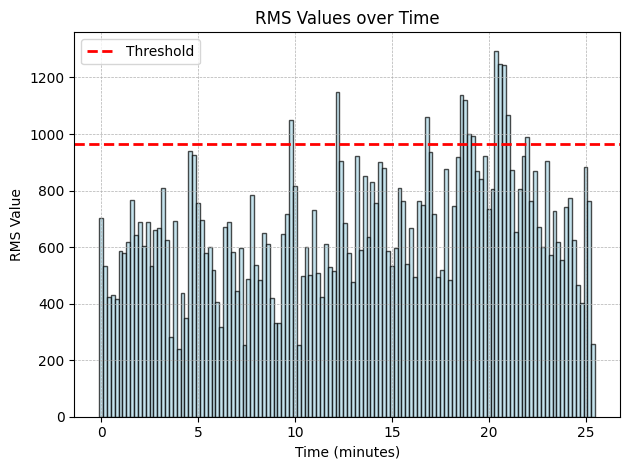

In [34]:
# Plotting bar plot for RMS values vs. time
plt.bar(time_values, rms_values, width=interval, color='lightblue', edgecolor='black', alpha=0.7)
# Drawing the threshold line
plt.axhline(y=threshold, color='red', linestyle='dashed', linewidth=2, label="Threshold")

plt.title("RMS Values over Time")
plt.xlabel("Time (minutes)")
plt.ylabel("RMS Value")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Timestamps above threshold: [9.8, 12.2, 16.8, 18.6, 18.8, 19.0, 19.2, 20.4, 20.6, 20.8, 21.0, 22.0]


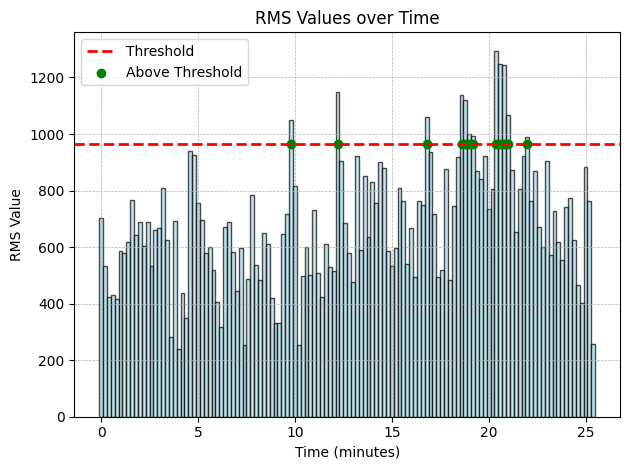

In [36]:
import matplotlib.pyplot as plt

# Assuming you have time_values, rms_values, threshold, and interval defined

# Create lists to store timestamps above the threshold
timestamps_above_threshold = []

# Plotting bar plot for RMS values vs. time
plt.bar(time_values, rms_values, width=interval, color='lightblue', edgecolor='black', alpha=0.7)

# Drawing the threshold line
plt.axhline(y=threshold, color='red', linestyle='dashed', linewidth=2, label="Threshold")

# Iterate through RMS values and time values to find timestamps above the threshold
for i in range(len(rms_values)):
    if rms_values[i] > threshold:
        timestamps_above_threshold.append(round(time_values[i], 2))

# Plotting the points above the threshold
plt.scatter(timestamps_above_threshold, [threshold] * len(timestamps_above_threshold), color='green', label="Above Threshold")

plt.title("RMS Values over Time")
plt.xlabel("Time (minutes)")
plt.ylabel("RMS Value")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the plot
plt.savefig("/content/drive/MyDrive/Dataset/Match1_Timestamps/rms_plot.png")

# Save timestamps to a text file
output_file_path = "/content/drive/MyDrive/Dataset/Match1_Timestamps/timestamps2.txt"
with open(output_file_path, "w") as file:
    for timestamp in timestamps_above_threshold:
        file.write(f"Start: {timestamp:.2f} min - End: {timestamp + interval:.2f} min\n")

# Print the timestamps above the threshold
print("Timestamps above threshold:", timestamps_above_threshold)


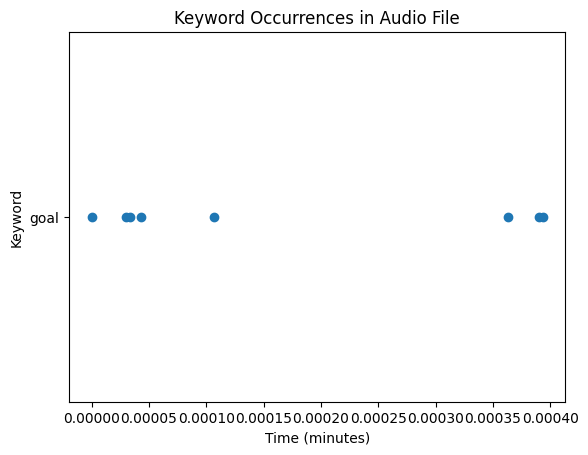

Start: 0.00 min - End: 0.20 min
 show reals. We'll see what happens in the real show. If you do look back at the goals he was scoring in Italy last season, he scores them with power of both sides. He is

Start: 1.80 min - End: 2.00 min
 centre. stands eight goals. 20 brick. Goes congressional street four average score eight goals to 28 table position brown stats losing those games by an

Start: 2.00 min - End: 2.20 min
 the [goal]#goal#. Sometimes in those games it could be okay and then all of a sudden they can see the [goal]#goal#. Something goes against them and they fall apart. Did you see that?

Start: 2.60 min - End: 2.80 min
 the bar rooms. We have a [goal]#goal# right underneath the making. The line. Which cross.aste of Uh mmm uh course. I just do not know if he lost the league on [goal]#goal# difference. House toward district third. I.

Start: 6.40 min - End: 6.60 min
 the [goal]#goal#. So leave it. I hope it's sacca. The card. It's a smooth, arstable ball movement. What's up 

In [37]:
import re
import whisper
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydub import AudioSegment

def format_keywords(text, keywords):
    for keyword in keywords:
        text = re.sub(r'(?i)\b{}\b'.format(re.escape(keyword)), r'[{0}]#{0}#'.format(keyword), text)
    return text

# Load the Whisper ASR model
model = whisper.load_model("base")

# Load the audio file
audio_file = AudioSegment.from_wav("/content/drive/MyDrive/Dataset/match1wav.wav")

# Transcribe the audio file with timestamps at 2-minute intervals
# segment_duration = 120000  # 2 minutes in milliseconds
segment_duration = 12000

timestamps = []

start_time = 0
while start_time < len(audio_file):
    end_time = min(start_time + segment_duration, len(audio_file))
    segment = audio_file[start_time:end_time]
    segment.export("/content/drive/MyDrive/Dataset/temp.wav", format="wav")
    result = model.transcribe("/content/drive/MyDrive/Dataset/temp.wav")
    timestamps.append((start_time, end_time, result["text"]))
    start_time += segment_duration

# Get the keywords to highlight
keywords = ["goal", "shot", "save", "penalty"]

# Filter the timestamps to only include those that have keywords
keyword_timestamps = []
for start, end, text in timestamps:
    if any(keyword in text for keyword in keywords):
        keyword_timestamps.append((start / 1000 / 60, end / 1000 / 60, text))

# Create a list of the keyword occurrences
keyword_occurrences = []
for start, end, text in keyword_timestamps:
    for keyword in keywords:
        if keyword in text:
            keyword_occurrences.append((start / 1000 / 60, keyword))

# Create a DataFrame of the keyword occurrences
keyword_occurrences_df = pd.DataFrame(keyword_occurrences, columns=["time", "keyword"])

# Create a graph of the keyword occurrences
plt.plot(keyword_occurrences_df["time"], keyword_occurrences_df["keyword"], "o")
plt.xlabel("Time (minutes)")
plt.ylabel("Keyword")
plt.title("Keyword Occurrences in Audio File")

# Save the graph
plt.savefig("/content/drive/MyDrive/Dataset/Match1_Timestamps/keyword_occurrences.png")
plt.show()

# Save timestamps to a text file
output_file_path = "/content/drive/MyDrive/Dataset/Match1_Timestamps/timestamps_with_keywords.txt"
with open(output_file_path, "w") as file:
    for start, end, text in keyword_timestamps:
        formatted_text = format_keywords(text, keywords)
        file.write(f"Start: {start:.2f} min - End: {end:.2f} min\n{formatted_text}\n")

# Output the transcriptions and timestamps with formatted keywords in minutes
for start, end, text in keyword_timestamps:
    formatted_text = format_keywords(text, keywords)
    print(f"Start: {start:.2f} min - End: {end:.2f} min\n{formatted_text}\n")


Comparing the timestamps.txt and timestamps2.txt


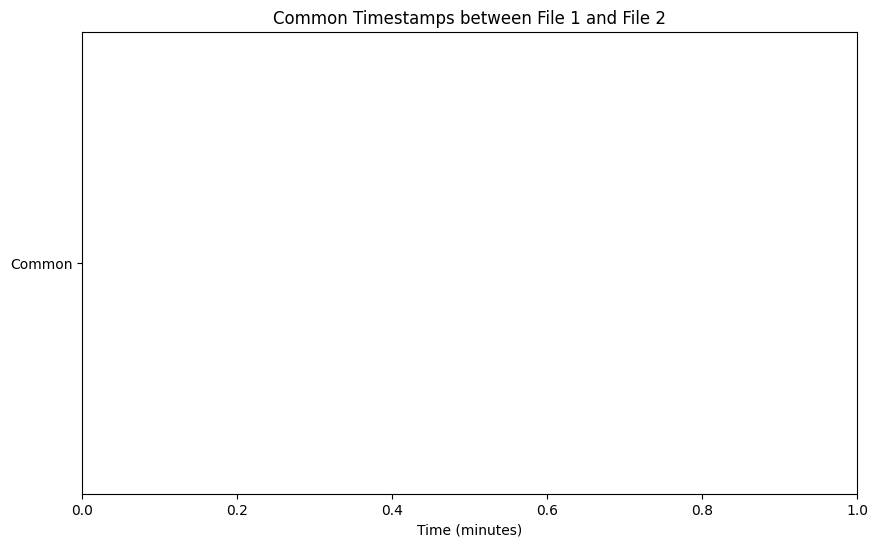

In [39]:
import re
import matplotlib.pyplot as plt

# Function to read timestamps from a text file
def read_timestamps(file_path):
    timestamps = []
    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(r'Start: (\d+\.\d+) min - End: (\d+\.\d+) min', line)
            if match:
                start_time = float(match.group(1))
                end_time = float(match.group(2))
                timestamps.append((start_time, end_time))
    return timestamps

# Function to compare two sets of timestamps
def compare_timestamps(file1_timestamps, file2_timestamps):
    common_timestamps = set(file1_timestamps) & set(file2_timestamps)
    unique_file1_timestamps = set(file1_timestamps) - common_timestamps
    unique_file2_timestamps = set(file2_timestamps) - common_timestamps

    return common_timestamps, unique_file1_timestamps, unique_file2_timestamps

# File paths
file1_path = '/content/drive/MyDrive/Dataset/Match1_Timestamps/timestamps.txt'  # Update with your file path
file2_path = '/content/drive/MyDrive/Dataset/Match1_Timestamps/timestamps2.txt'  # Update with your file path

# Read timestamps from files
file1_timestamps = read_timestamps(file1_path)
file2_timestamps = read_timestamps(file2_path)

# Compare timestamps
common_timestamps, _, _ = compare_timestamps(file1_timestamps, file2_timestamps)

# Plot the comparison
plt.figure(figsize=(10, 6))

# Plotting common timestamps
for start, end in common_timestamps:
    plt.plot([start, end], [0.5, 0.5], color='green', marker='o')

plt.yticks([0.5], ['Common'])
plt.title("Common Timestamps between File 1 and File 2")
plt.xlabel("Time (minutes)")
plt.show()


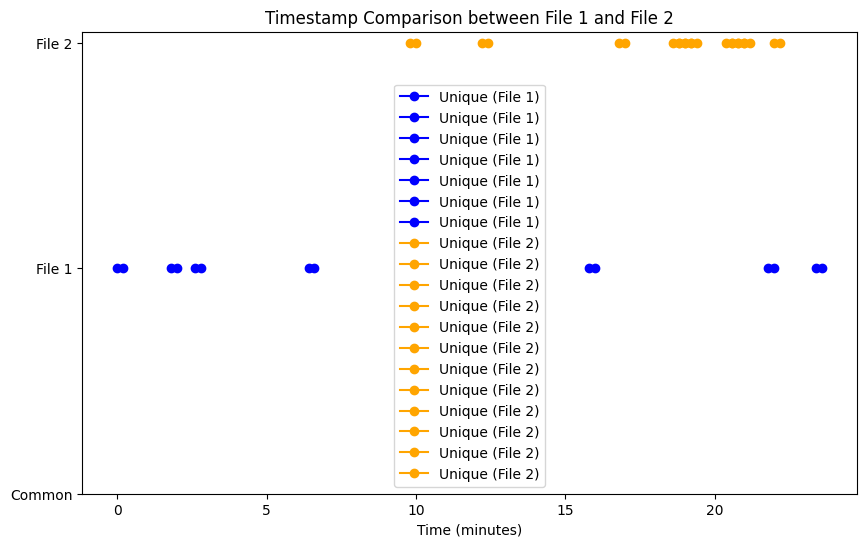

Timestamps and Graph saved successfully!


<Figure size 640x480 with 0 Axes>

In [41]:
import re
import matplotlib.pyplot as plt

# Function to read timestamps from a text file
def read_timestamps(file_path):
    timestamps = []
    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(r'Start: (\d+\.\d+) min - End: (\d+\.\d+) min', line)
            if match:
                start_time = float(match.group(1))
                end_time = float(match.group(2))
                timestamps.append((start_time, end_time))
    return timestamps

# Function to compare two sets of timestamps
def compare_timestamps(file1_timestamps, file2_timestamps):
    common_timestamps = set(file1_timestamps) & set(file2_timestamps)
    unique_file1_timestamps = set(file1_timestamps) - common_timestamps
    unique_file2_timestamps = set(file2_timestamps) - common_timestamps

    return common_timestamps, unique_file1_timestamps, unique_file2_timestamps

# File paths
file1_path = '/content/drive/MyDrive/Dataset/Match1_Timestamps/timestamps.txt'  # Update with your file path
file2_path = '/content/drive/MyDrive/Dataset/Match1_Timestamps/timestamps2.txt'  # Update with your file path

# Read timestamps from files
file1_timestamps = read_timestamps(file1_path)
file2_timestamps = read_timestamps(file2_path)

# Compare timestamps
common_timestamps, unique_file1_timestamps, unique_file2_timestamps = compare_timestamps(file1_timestamps, file2_timestamps)

# Plot the comparison
plt.figure(figsize=(10, 6))

# Plotting common timestamps for File 1
for start, end in common_timestamps:
    plt.plot([start, end], [0.5, 0.5], color='green', marker='o', label='Common (File 1)')

# Plotting unique timestamps for File 1
for start, end in unique_file1_timestamps:
    plt.plot([start, end], [1.5, 1.5], color='blue', marker='o', label='Unique (File 1)')

# Plotting unique timestamps for File 2
for start, end in unique_file2_timestamps:
    plt.plot([start, end], [2.5, 2.5], color='orange', marker='o', label='Unique (File 2)')

plt.yticks([0.5, 1.5, 2.5], ['Common', 'File 1', 'File 2'])
plt.title("Timestamp Comparison between File 1 and File 2")
plt.xlabel("Time (minutes)")
plt.legend()
plt.show()


plt.savefig("/content/drive/MyDrive/Dataset/Match1_Timestamps/timestamps_comparison.png")


output_file_path = "/content/drive/MyDrive/Dataset/Match1_Timestamps/final_timestamps.txt"
with open(output_file_path, "w") as file:
    for start, end in common_timestamps:
        file.write(f"Common Timestamp: Start: {start:.2f} min - End: {end:.2f} min\n")
    for start, end in unique_file1_timestamps:
        file.write(f"Unique (File 1) Timestamp: Start: {start:.2f} min - End: {end:.2f} min\n")
    for start, end in unique_file2_timestamps:
        file.write(f"Unique (File 2) Timestamp: Start: {start:.2f} min - End: {end:.2f} min\n")

print("Timestamps and Graph saved successfully!")


**Getting audio part where the keywords are detected**

In [42]:
keyword_timestamps = []
for start, end, text in timestamps:
    if any(keyword in text for keyword in keywords):
        keyword_timestamps.append((start, end, text))

num_keyword_occurrences = len(keyword_timestamps)
print(f"Number of timestamps with keywords: {num_keyword_occurrences}")
keyword_occurrences = []
for start, end, text in keyword_timestamps:
    for keyword in keywords:
        if keyword in text:
            keyword_occurrences.append((start /1000/60, keyword))


Number of timestamps with keywords: 8


In [43]:
# Process the audio file to extract segments based on detected keywords
output_folder = "/content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_audio/"
os.makedirs(output_folder, exist_ok=True)

for start, end, _ in keyword_timestamps:
    start_time = max(0, start - 5000)  # Adding a buffer of 1 second before the detected timestamp
    end_time = min(len(audio_file), end + 5000)  # Adding a buffer of 2 seconds after the detected timestamp

    # Extract the segment and save it to the output folder
    segment = audio_file[start_time:end_time]
    output_file_path = os.path.join(output_folder, f"segment_{start_time}_{end_time}.wav")
    segment.export(output_file_path, format="wav")

print("Audio segments have been saved to:", output_folder)

Audio segments have been saved to: /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_audio/


In [44]:
!pip install moviepy

In [45]:
from pydub import AudioSegment
from pydub.playback import play

def count_audio_segments(folder_path):
    # Get a list of all files in the specified folder
    files = os.listdir(folder_path)

    # Filter the list to include only WAV files
    audio_segments = [file for file in files if file.endswith(".wav")]

    # Count the number of audio segment files
    count = len(audio_segments)

    return count, audio_segments

# Specify the folder containing the audio segments
folder_path = "/content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_audio"

# Count the number of audio segment files in the folder and get the list of files
segment_count, audio_segments = count_audio_segments(folder_path)

print(f"Number of audio segment files in {folder_path}: {segment_count}")



Number of audio segment files in /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_audio: 8


In [48]:
import wave
import os

def combine_and_play_audio(folder_path, audio_segments):
    # Combine audio segments into one
    combined_path = os.path.join(folder_path, "/content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_audio/combined_audio.wav")

    with wave.open(combined_path, 'wb') as combined_audio:
        for i, segment_file in enumerate(audio_segments):
            segment_path = os.path.join(folder_path, segment_file)
            with wave.open(segment_path, 'rb') as segment:
                # Ensure the properties match for the first segment
                if i == 0:
                    combined_audio.setnchannels(segment.getnchannels())
                    combined_audio.setsampwidth(segment.getsampwidth())
                    combined_audio.setframerate(segment.getframerate())

                # Ensure the sample width, frame rate, and channels match
                if (
                    combined_audio.getsampwidth() != segment.getsampwidth() or
                    combined_audio.getframerate() != segment.getframerate() or
                    combined_audio.getnchannels() != segment.getnchannels()
                ):
                    print("Warning: Audio properties do not match for segment", i + 1)

                combined_audio.writeframes(segment.readframes(segment.getnframes()))

    # Play the combined audio
    os.system(f"start {combined_path}")

# Specify the folder containing the audio segments
folder_path = "/content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_audio/"

# Count the number of audio segment files in the folder and get the list of files
segment_count, audio_segments = count_audio_segments(folder_path)

print(f"Number of audio segment files in {folder_path}: {segment_count}")

# Combine the audio segments and play the result
combine_and_play_audio(folder_path, audio_segments)


Number of audio segment files in /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_audio/: 8


In [49]:
!pip install pysoundfile
!pip install bitstring

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
import IPython
IPython.display.Audio("/content/trimmed_audio/combined_audio.wav")

Video Generation

In [50]:
import os
import re
import whisper
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydub import AudioSegment
from moviepy.video.io.VideoFileClip import VideoFileClip

# Specify the path to your original video file
video_file_path = "/content/drive/MyDrive/Dataset/match1_30mins.mp4"

# Set the output folder for trimmed videos
output_folder_videos = "/content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video"
os.makedirs(output_folder_videos, exist_ok=True)

# Iterate over the keyword timestamps and trim the video
for start, end, _ in keyword_timestamps:
    start_time = max(0, start - 5000) / 1000  # Convert to seconds
    end_time = min(len(audio_file), end + 5000) / 1000  # Convert to seconds

    # Trim the video using moviepy
    with VideoFileClip(video_file_path) as video_clip:
        trimmed_clip = video_clip.subclip(start_time, end_time)
        output_path = os.path.join(output_folder_videos, f"trimmed_video_{start_time}_{end_time}.mp4")
        trimmed_clip.write_videofile(output_path, codec="libx264", audio_codec="aac")

print("Videos have been saved to:", output_folder_videos)

Moviepy - Building video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_0.0_17.0.mp4.
MoviePy - Writing audio in trimmed_video_0.0_17.0TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_0.0_17.0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_0.0_17.0.mp4
Moviepy - Building video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_103.0_125.0.mp4.
MoviePy - Writing audio in trimmed_video_103.0_125.0TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_103.0_125.0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_103.0_125.0.mp4
Moviepy - Building video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_115.0_137.0.mp4.
MoviePy - Writing audio in trimmed_video_115.0_137.0TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_115.0_137.0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_115.0_137.0.mp4
Moviepy - Building video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_151.0_173.0.mp4.
MoviePy - Writing audio in trimmed_video_151.0_173.0TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_151.0_173.0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_151.0_173.0.mp4
Moviepy - Building video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_379.0_401.0.mp4.
MoviePy - Writing audio in trimmed_video_379.0_401.0TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_379.0_401.0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_379.0_401.0.mp4
Moviepy - Building video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_1303.0_1325.0.mp4.
MoviePy - Writing audio in trimmed_video_1303.0_1325.0TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_1303.0_1325.0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_1303.0_1325.0.mp4
Moviepy - Building video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_1399.0_1421.0.mp4.
MoviePy - Writing audio in trimmed_video_1399.0_1421.0TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_1399.0_1421.0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_1399.0_1421.0.mp4
Moviepy - Building video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_1411.0_1433.0.mp4.
MoviePy - Writing audio in trimmed_video_1411.0_1433.0TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_1411.0_1433.0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_1411.0_1433.0.mp4
Videos have been saved to: /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video


In [51]:
import os
from moviepy.editor import VideoFileClip, concatenate_videoclips

# Specify the path to the folder containing trimmed videos
video_folder_path = "/content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video"

# Specify the output path for the combined highlight video
output_combined_video_path = "/content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/highlight_combined.mp4"

# Get the list of trimmed video files
video_files = [f for f in os.listdir(video_folder_path) if f.endswith(".mp4")]

# Sort the video files based on their start time
video_files.sort(key=lambda x: float(re.search(r'\d+\.\d+_\d+\.\d+', x).group().split('_')[0]))

# Create a list to store video clips
video_clips = []

# Iterate over the sorted video files and create VideoFileClip objects
for video_file in video_files:
    video_path = os.path.join(video_folder_path, video_file)
    video_clip = VideoFileClip(video_path)
    video_clips.append(video_clip)

# Concatenate the video clips into a single highlight video
final_highlight_video = concatenate_videoclips(video_clips, method="compose")

# Write the final highlight video to the specified output path
final_highlight_video.write_videofile(output_combined_video_path, codec="libx264", audio_codec="aac")

print("Combined highlight video has been saved to:", output_combined_video_path)


Moviepy - Building video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/highlight_combined.mp4.
MoviePy - Writing audio in highlight_combinedTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/highlight_combined.mp4



t:  10%|▉         | 509/5135 [00:22<02:12, 34.84it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_0.0_17.0.mp4, 1229760 bytes wanted but 0 bytes read,at frame 510/511, at time 17.00/17.02 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

t:  23%|██▎       | 1172/5135 [00:47<03:21, 19.68it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/trimmed_video_103.0_125.0.mp4, 1229760 bytes wanted but 0 bytes read,at frame 660/661, at time 22.00/22.02 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

t:  49%|████▊     | 2491/5135 [01:35<02:10, 20.23it/s, now=None]WARNING:py.warni

Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/highlight_combined.mp4
Combined highlight video has been saved to: /content/drive/MyDrive/Dataset/Match1_Timestamps/trimmed_video/highlight_combined.mp4
